## Accuracy and Confusion Matrix

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

In [2]:
from  sklearn.datasets import load_breast_cancer

In [3]:
Cancer = load_breast_cancer()

In [4]:
print(load_breast_cancer()['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
y = Cancer.target

In [6]:
X = pd.DataFrame(Cancer.data, columns=Cancer.feature_names)
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [8]:
clf = KNeighborsClassifier()
clf.fit(X,y)

KNeighborsClassifier()

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
print(accuracy_score(y,clf.predict(X))*100)

print(confusion_matrix(y,clf.predict(X)))
#94.72% -> Accurately classified
#5.28% -> Misclassified



94.72759226713534
[[191  21]
 [  9 348]]


In [15]:
(191+348)/X.shape[0]

0.9472759226713533

[[191  21]
 [  9 348]]


Text(0,0.5,'Test Data')

<Figure size 1800x1800 with 0 Axes>

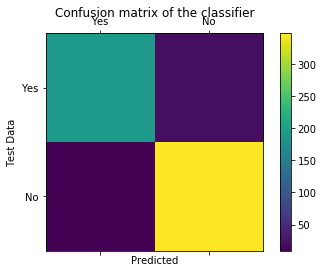

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
labels = ['Yes','No']
cm = confusion_matrix(y, clf.predict(X))
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Test Data')

## RoC_AUC

Roc - > Reciever Operator Char.

Auc - > Area Under the Curve

#### True Positivity rate(Sensitivity) = Tp/(Fn+Tp)


#### True Negative rate(Specifity) = Tn/(Fp+Tn)


#### False Positive rate = Fp/(Tn+Fp)

In [18]:
from sklearn import metrics 

In [20]:
y_pred_proba = clf.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)

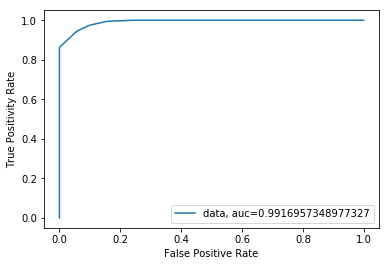

In [62]:
y_pred_proba = clf.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positivity Rate')
plt.show()

In [63]:
from sklearn.metrics import roc_auc_score

In [64]:
roc_auc_score(clf.predict(X),y)

0.9490447154471544

### Classification Report => Accuracy,Recall,Precision,F1 Score(Combination of precision and Recall)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(clf.predict(X),y))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       200
           1       0.97      0.94      0.96       369

    accuracy                           0.95       569
   macro avg       0.94      0.95      0.94       569
weighted avg       0.95      0.95      0.95       569



## Precision



#### Precision = Tp/Tp+Fp  
###### Ratio of correctly predicted positives to total predicted positives
###### What proportion of predicted positive values are actually positive
###### Model Effectiveness on the captured variation

Example : 

Business use case is (We want to decrease credit limit - > Target[Whether to decrease limit or not])) and our priority is customer satisfaction so we want to avoid all cases where we decrease limit of a customer that can afford the higher limit.


Classification model:
1 -> Can decrease limit
0 -> Cannot decrease limit


False Positive Case -> We decrease cr limit of a person who can afford it (Predicted : 1 actual : 0)

#### Advantage of high precision:

To decrease FP cases we increase threshold : 0.9 :: Higher Threshold of positive classification == Higher precision value


#### Disadvantage of chasing a high precision with higher thresholds:

1.) Since we have a high threshold of prob for default to decrease the credit limit (i.e. 90%) we give higher credit limits to people with 80% chance of default that means we are giving riskier loans and hence there is a higher chance of losing   money. 







## Recall

#### recall = Tp/(Tp+Fn)
#### Ratio of all correctly predicted positive values to all the positive values
#### What proportion of actual positives are predicted positives

#### Of how well your data is engineered and also a combination of how well you've selected your model on the basis of your data(Recall depends a lot on your data)



## F-1 Score

#### Harmonic Mean of Precision and Recall

F1 = 2*(Precision X recall)/(Precision+recall)

#### Weighted Average of acc, Precision and Recall

